In [3]:
%load_ext autoreload
%autoreload 2
%cd ..

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo


In [4]:
import sys

import numpy as np
import random 
import tensorflow as tf

from tensorflow import keras
from keras import layers

from matplotlib import pyplot as plt

from scripts.CustomCallbacks import CustomLogger
import scripts.utils as utils
import scripts.Slopes as Slopes

utils.reset_seeds(0)

In [3]:
def plot_mean_and_variance(m, X, X_train=np.linspace(-1, 1, 50), y_train=None):
    # for each prediction, plot the mean value and the variance of the prediction
    if y_train is None:
        y_train = X_train**2
        
    y_pred = m.predict(X)
    # print(y_pred)
    y_pred_mean, y_pred_sd = y_pred[:,0], y_pred[:,1]
    y_pred_sd = np.exp(y_pred_sd)
    plt.plot(X, y_pred_mean, label="mean")
    plt.fill_between(X, y_pred_mean - y_pred_sd, y_pred_mean + y_pred_sd, alpha=0.2, label="variance")
    plt.scatter(X_train, y_train, marker='+', color="red", label="train")
    plt.legend()
    plt.show()

In [4]:
def neg_log_likelihood(y_true ,y_predicted):
    y_pred_mean, y_pred_sd = y_predicted[:,0], y_predicted[:,1]


    y_pred_sd = tf.clip_by_value(t=y_pred_sd,
                                   clip_value_min=tf.constant(-15.0),
                                   clip_value_max=tf.constant(+15.0))

    # y_pred_sd ongi log variance
    return tf.reduce_mean(y_pred_sd + tf.math.square((y_pred_mean - y_true) / tf.math.exp(y_pred_sd)))

mängime veel samade parameetritega kui viimati

Epoch:   0 | Loss: 1.64339e-01
Epoch: 100 | Loss: -3.35483e-01
Epoch: 200 | Loss: -3.25488e-01
Epoch: 300 | Loss: -3.22929e-01
Epoch: 400 | Loss: -3.16916e-01
Epoch: 500 | Loss: -3.21944e-01
Epoch: 600 | Loss: -3.42811e-01
Epoch: 700 | Loss: -3.34810e-01
Epoch: 800 | Loss: -3.44418e-01
Epoch: 900 | Loss: -3.46521e-01
313/313 [==============================] - 1s 2ms/step


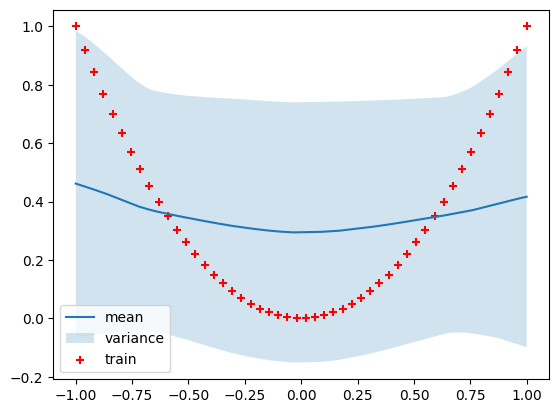

In [5]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=100, activation='relu', name="layer_1"),
    layers.Dense(units=100, activation='relu', name="layer_2"),
    layers.Dense(units=2, activation='linear', name="layer_3")#, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)),
])
# last_layer = model.get_layer('layer_3')
# l_w = last_layer.get_weights()


X = np.linspace(-1, 1, 50)
y = X**2
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.001, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=1000, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


plot_mean_and_variance(model, X_valid, X_train)

seame käsitsi variance biasile erinevaid kaale 

In [6]:
biases = model.get_layer('layer_3').get_weights()
biases[1][1] = -2
print(biases[1])
model.get_layer('layer_3').set_weights(biases)

[ 0.03495571 -2.        ]


313/313 [==============================] - 0s 1ms/step


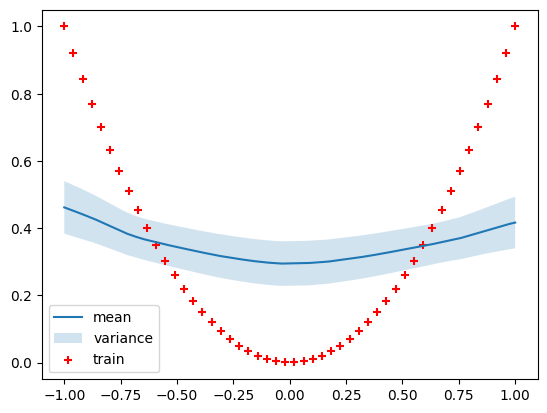

In [7]:
plot_mean_and_variance(model, X_valid, X_train)

Epoch:   0 | Loss: 1.27574e+01
Epoch: 100 | Loss: -3.33299e-01
Epoch: 200 | Loss: -3.23417e-01
Epoch: 300 | Loss: -3.23094e-01
Epoch: 400 | Loss: -3.18826e-01
Epoch: 500 | Loss: -3.22263e-01
Epoch: 600 | Loss: -3.42772e-01
Epoch: 700 | Loss: -3.33606e-01
Epoch: 800 | Loss: -3.45426e-01
Epoch: 900 | Loss: -3.47675e-01
313/313 [==============================] - 0s 1ms/step


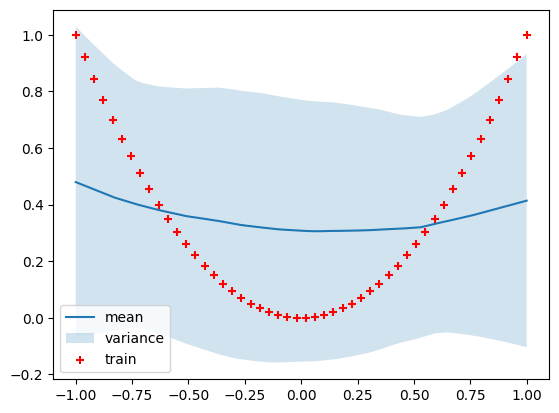

In [8]:
h = model.fit(X, y, batch_size=8, epochs=1000, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)

plot_mean_and_variance(model, X_valid, X_train)

## fixed loss func

In [9]:
def neg_log_likelihood(y_true ,y_predicted):
    y_pred_mean, y_pred_sd = y_predicted[:,0], y_predicted[:,1]


    y_pred_sd = tf.clip_by_value(t=y_pred_sd,
                                   clip_value_min=tf.constant(-15.0),
                                   clip_value_max=tf.constant(+15.0))

    # y_pred_sd ongi log variance
    return tf.reduce_mean(y_pred_sd + tf.math.square(y_pred_mean - y_true) / tf.math.exp(y_pred_sd))

In [10]:
def plot_mean_and_variance(m, X, X_train=np.linspace(-1, 1, 50), y_train=None):
    # for each prediction, plot the mean value and the variance of the prediction
    if y_train is None:
        y_train = X_train**2
        
    y_pred = m.predict(X)
    # print(y_pred)
    y_pred_mean, y_pred_sd = y_pred[:,0], y_pred[:,1]
    y_pred_sd = np.exp(y_pred_sd)
    plt.plot(X, y_pred_mean, label="mean")
    plt.fill_between(X, y_pred_mean - y_pred_sd, y_pred_mean + y_pred_sd, alpha=0.2, label="variance")
    plt.scatter(X_train, y_train, marker='+', color="red", label="train")
    plt.legend()
    plt.show()

Epoch:   0 | Loss: 1.79500e-01
Epoch: 100 | Loss: -1.32157e+00
Epoch: 200 | Loss: -1.33507e+00
Epoch: 300 | Loss: -1.33938e+00
Epoch: 400 | Loss: -1.30988e+00
Epoch: 500 | Loss: -1.32543e+00
Epoch: 600 | Loss: -1.33821e+00
Epoch: 700 | Loss: -1.33797e+00
Epoch: 800 | Loss: -1.37613e+00
Epoch: 900 | Loss: -1.36445e+00
Epoch: 1000 | Loss: -1.33491e+00
Epoch: 1100 | Loss: -1.31385e+00
Epoch: 1200 | Loss: -1.32544e+00
Epoch: 1300 | Loss: -1.30603e+00
Epoch: 1400 | Loss: -1.32761e+00
Epoch: 1500 | Loss: -1.34869e+00
Epoch: 1600 | Loss: -1.34332e+00
Epoch: 1700 | Loss: -1.33685e+00
Epoch: 1800 | Loss: -1.32672e+00
Epoch: 1900 | Loss: -1.32122e+00
313/313 [==============================] - 1s 3ms/step


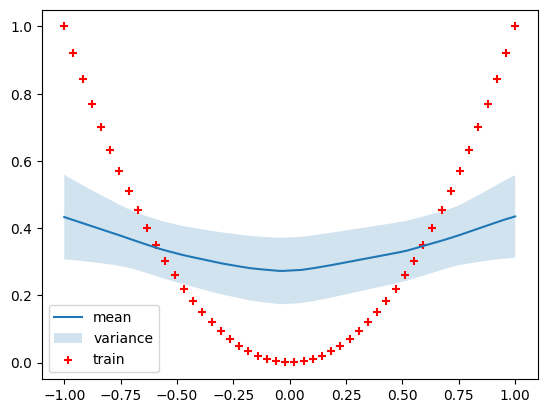

In [11]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=100, activation='relu', name="layer_1"),
    layers.Dense(units=100, activation='relu', name="layer_2"),
    #layers.Dense(units=100, activation='relu', name="layer_2b"),
    layers.Dense(units=2, activation='linear', name="layer_3")#, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)),
])
# last_layer = model.get_layer('layer_3')
# l_w = last_layer.get_weights()


X = np.linspace(-1, 1, 50)
y = X**2
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.001, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=16, epochs=2000, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


plot_mean_and_variance(model, X_valid, X_train)

Epoch:   0 | Loss: 2.08986e-01
Epoch: 100 | Loss: -1.30925e+00
Epoch: 200 | Loss: -1.33625e+00
Epoch: 300 | Loss: -1.33976e+00
Epoch: 400 | Loss: -1.30884e+00
Epoch: 500 | Loss: -1.32546e+00
Epoch: 600 | Loss: -1.33348e+00
Epoch: 700 | Loss: -1.33760e+00
Epoch: 800 | Loss: -1.37539e+00
Epoch: 900 | Loss: -1.35740e+00
Epoch: 1000 | Loss: -1.33531e+00
Epoch: 1100 | Loss: -1.31643e+00
Epoch: 1200 | Loss: -1.31973e+00
Epoch: 1300 | Loss: -1.31233e+00
Epoch: 1400 | Loss: -1.32761e+00
Epoch: 1500 | Loss: -1.34688e+00
Epoch: 1600 | Loss: -1.34247e+00
Epoch: 1700 | Loss: -1.33911e+00
Epoch: 1800 | Loss: -1.32591e+00
Epoch: 1900 | Loss: -1.32023e+00
Epoch: 2000 | Loss: -1.34825e+00
Epoch: 2100 | Loss: -1.31229e+00
Epoch: 2200 | Loss: -1.34834e+00
Epoch: 2300 | Loss: -1.32274e+00
Epoch: 2400 | Loss: -1.33362e+00
Epoch: 2500 | Loss: -1.35503e+00
Epoch: 2600 | Loss: -1.31101e+00
Epoch: 2700 | Loss: -1.31647e+00
Epoch: 2800 | Loss: -1.33711e+00
Epoch: 2900 | Loss: -1.35317e+00
Epoch: 3000 | Loss: -

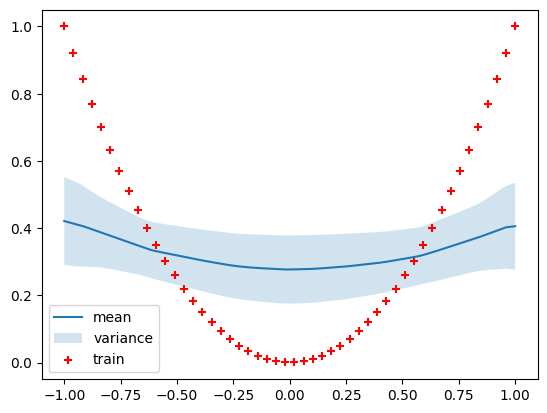

In [12]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=100, activation='relu', name="layer_1"),
    layers.Dense(units=100, activation='relu', name="layer_2"),
    layers.Dense(units=100, activation='relu', name="layer_2b"),
    layers.Dense(units=2, activation='linear', name="layer_3")#, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)),
])
# last_layer = model.get_layer('layer_3')
# l_w = last_layer.get_weights()


X = np.linspace(-1, 1, 50)
y = X**2
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.001, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=16, epochs=4000, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


plot_mean_and_variance(model, X_valid, X_train)

## whatif on liiga suured sammud, vnagu ühel tuleb palju muuta aga teisel ainult natinatukene

In [13]:
def plot_mean_and_variance(m, X, X_train=np.linspace(-1, 1, 50), y_train=None):
    # for each prediction, plot the mean value and the variance of the prediction
    if y_train is None:
        y_train = X_train**2
        
    y_pred = m.predict(X)
    # print(y_pred)
    y_pred_mean, y_pred_sd = y_pred[:,0], y_pred[:,1]
    #y_pred_sd = np.exp(y_pred_sd)
    plt.plot(X, y_pred_mean, label="mean")
    plt.fill_between(X, y_pred_mean - y_pred_sd, y_pred_mean + y_pred_sd, alpha=0.2, label="variance")
    plt.scatter(X_train, y_train, marker='+', color="red", label="train")
    plt.legend()
    plt.show()

In [22]:
def neg_log_likelihood(y_true ,y_predicted):
    y_pred_mean, y_pred_sd = y_predicted[:,0], y_predicted[:,1]


    # y_pred_sd = tf.clip_by_value(t=y_pred_sd,
    #                                clip_value_min=tf.constant(-10.0),
    #                                clip_value_max=tf.constant(0.0001))

    # return tf.reduce_mean(tf.math.log(y_pred_sd) + 100*tf.math.square(y_pred_mean - y_true) / y_pred_sd)
    y_pred_sd = tf.clip_by_value(t=y_pred_sd,
                                clip_value_min=tf.constant(1e-6),
                                clip_value_max=tf.constant(1e6))

    return tf.reduce_mean(tf.math.log(y_pred_sd) + tf.math.square(y_pred_mean - y_true) / y_pred_sd)

Epoch:   0 | Loss: -6.74480e-01
Epoch: 100 | Loss: -1.39763e+00
Epoch: 200 | Loss: -1.36833e+00
Epoch: 300 | Loss: -1.35514e+00
Epoch: 400 | Loss: -1.39518e+00
Epoch: 500 | Loss: -1.39471e+00
Epoch: 600 | Loss: -1.39674e+00
Epoch: 700 | Loss: -1.38307e+00
Epoch: 800 | Loss: -1.39942e+00
Epoch: 900 | Loss: -1.38109e+00
Epoch: 1000 | Loss: -1.37975e+00
Epoch: 1100 | Loss: -1.38200e+00
Epoch: 1200 | Loss: -1.37649e+00
Epoch: 1300 | Loss: -1.38267e+00
Epoch: 1400 | Loss: -1.38887e+00
Epoch: 1500 | Loss: -1.41083e+00
Epoch: 1600 | Loss: -1.37045e+00
Epoch: 1700 | Loss: -1.39501e+00
Epoch: 1800 | Loss: -1.38821e+00
Epoch: 1900 | Loss: -1.36445e+00
313/313 [==============================] - 0s 1ms/step


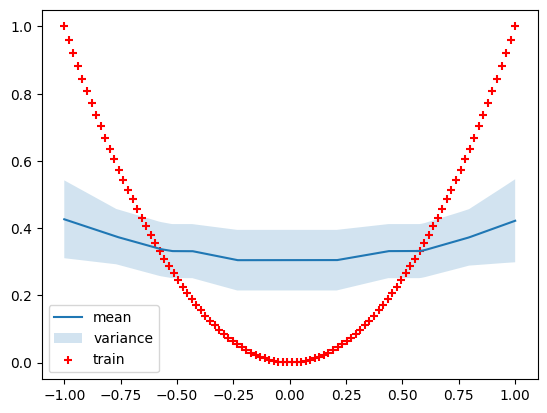

In [23]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=10, activation='relu', name="layer_1"),
    layers.Dense(units=10, activation='relu', name="layer_2"),
    # layers.Dense(units=100, activation='relu', name="layer_2b"),
    layers.Dense(units=2, activation='linear', name="layer_3")#, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)),
])
# last_layer = model.get_layer('layer_3')
# l_w = last_layer.get_weights()


X = np.linspace(-1, 1, 100)
y = X**2
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.01, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=2000, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


plot_mean_and_variance(model, X_valid, X_train)

In [24]:
model.predict(X_train)

4/4 [==============================] - 0s 1ms/step


array([[0.42624435, 0.11583155],
       [0.42172122, 0.1128968 ],
       [0.41719815, 0.10996207],
       [0.41267505, 0.10702734],
       [0.40815195, 0.10409261],
       [0.40362886, 0.10115787],
       [0.3991058 , 0.09822313],
       [0.3945827 , 0.0952884 ],
       [0.3900596 , 0.09235368],
       [0.3855365 , 0.08941894],
       [0.3810134 , 0.08648421],
       [0.3764903 , 0.08354948],
       [0.37237975, 0.08224059],
       [0.36855778, 0.08206903],
       [0.3647358 , 0.08189747],
       [0.36091384, 0.08172592],
       [0.35709187, 0.08155436],
       [0.3532699 , 0.0813828 ],
       [0.34944794, 0.08121125],
       [0.34562597, 0.08103969],
       [0.341804  , 0.08086812],
       [0.33809066, 0.08070145],
       [0.33550107, 0.0805852 ],
       [0.33309722, 0.0804773 ],
       [0.3315202 , 0.08040652],
       [0.3315202 , 0.08040652],
       [0.3315202 , 0.08040652],
       [0.3315202 , 0.08040652],
       [0.3315202 , 0.08040652],
       [0.32906145, 0.0812951 ],
       [0.

Epoch:   0 | Loss: 4.96355e+04
Epoch: 100 | Loss: -1.13296e+00
Epoch: 200 | Loss: -1.20517e+00
Epoch: 300 | Loss: -1.23650e+00
Epoch: 400 | Loss: -1.34899e+00
Epoch: 500 | Loss: -1.33673e+00
Epoch: 600 | Loss: -1.34360e+00
Epoch: 700 | Loss: -1.36111e+00
Epoch: 800 | Loss: -1.39206e+00
Epoch: 900 | Loss: -1.36613e+00
Epoch: 1000 | Loss: -1.37651e+00
Epoch: 1100 | Loss: -1.36220e+00
Epoch: 1200 | Loss: -1.38572e+00
Epoch: 1300 | Loss: -1.37697e+00
Epoch: 1400 | Loss: -1.36632e+00
Epoch: 1500 | Loss: -1.40567e+00
Epoch: 1600 | Loss: -1.35570e+00
Epoch: 1700 | Loss: -1.39574e+00
Epoch: 1800 | Loss: -1.38916e+00
Epoch: 1900 | Loss: -1.36574e+00
313/313 [==============================] - 1s 2ms/step


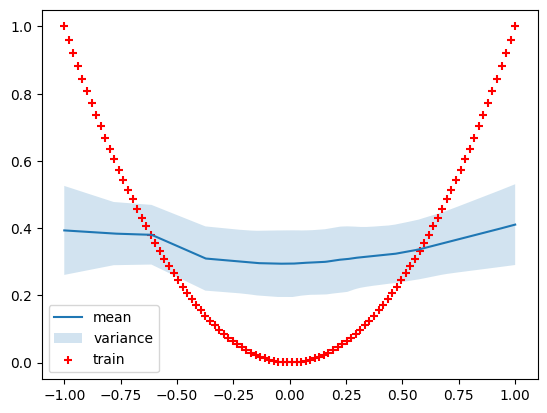

In [25]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=100, activation='relu', name="layer_1"),
    layers.Dense(units=100, activation='relu', name="layer_2"),
    # layers.Dense(units=100, activation='relu', name="layer_2b"),
    layers.Dense(units=2, activation='linear', name="layer_3")#, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)),
])
# last_layer = model.get_layer('layer_3')
# l_w = last_layer.get_weights()


X = np.linspace(-1, 1, 100)
y = X**2
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.01, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=2000, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


plot_mean_and_variance(model, X_valid, X_train)

## mängime kaaludega

Epoch:   0 | Loss: 4.25294e+05
Epoch: 100 | Loss: 9.31451e-01
Epoch: 200 | Loss: 9.62353e-01
Epoch: 300 | Loss: 9.77700e-01
Epoch: 400 | Loss: 9.74561e-01
Epoch: 500 | Loss: 9.72191e-01
Epoch: 600 | Loss: 9.25590e-01
Epoch: 700 | Loss: 9.43210e-01
Epoch: 800 | Loss: 9.21907e-01
Epoch: 900 | Loss: 9.10605e-01
Epoch: 1000 | Loss: 9.61601e-01
Epoch: 1100 | Loss: 9.73772e-01
Epoch: 1200 | Loss: 8.89552e-01
Epoch: 1300 | Loss: 9.65680e-01
Epoch: 1400 | Loss: 9.81158e-01
313/313 [==============================] - 1s 2ms/step


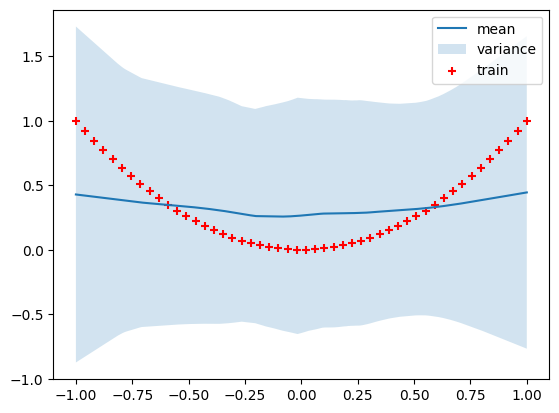

In [27]:
def neg_log_likelihood(y_true ,y_predicted):
    y_pred_mean, y_pred_sd = y_predicted[:,0], y_predicted[:,1]


    # y_pred_sd = tf.clip_by_value(t=y_pred_sd,
    #                                clip_value_min=tf.constant(-10.0),
    #                                clip_value_max=tf.constant(0.0001))

    # return tf.reduce_mean(tf.math.log(y_pred_sd) + 100*tf.math.square(y_pred_mean - y_true) / y_pred_sd)
    y_pred_sd = tf.clip_by_value(t=y_pred_sd,
                                clip_value_min=tf.constant(1e-6),
                                clip_value_max=tf.constant(1e6))

    return tf.reduce_mean(tf.math.log(y_pred_sd) + 10 * tf.math.square(y_pred_mean - y_true) / y_pred_sd)

utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=100, activation='relu', name="layer_1"),
    layers.Dense(units=100, activation='relu', name="layer_2"),
    # layers.Dense(units=100, activation='relu', name="layer_2b"),
    layers.Dense(units=2, activation='linear', name="layer_3")#, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)),
])
# last_layer = model.get_layer('layer_3')
# l_w = last_layer.get_weights()


X = np.linspace(-1, 1, 50)
y = X**2
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.01, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=1500, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


plot_mean_and_variance(model, X_valid, X_train)

Epoch:   0 | Loss: 5.23362e+04
Epoch: 100 | Loss: 9.45327e+04
Epoch: 200 | Loss: -9.04946e+00
Epoch: 300 | Loss: -4.34724e+00
Epoch: 400 | Loss: 8.84360e-01
Epoch: 500 | Loss: 5.61938e-01
Epoch: 600 | Loss: 2.03493e-01
Epoch: 700 | Loss: -2.28368e-01
Epoch: 800 | Loss: -8.56881e-01
Epoch: 900 | Loss: -3.13560e+00
Epoch: 1000 | Loss: -1.40351e-01
Epoch: 1100 | Loss: -5.12385e-01
Epoch: 1200 | Loss: 1.31399e+01
Epoch: 1300 | Loss: 1.23843e+01
Epoch: 1400 | Loss: 1.22502e+01
313/313 [==============================] - 0s 1ms/step


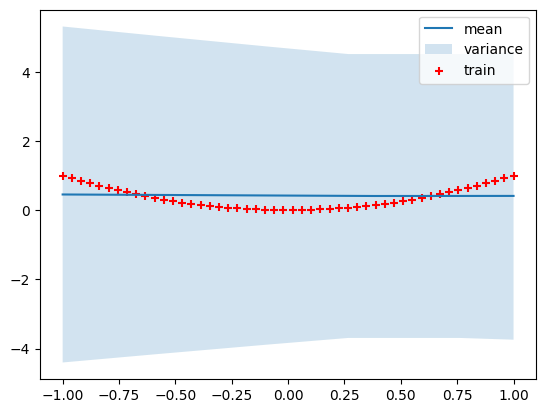

In [29]:
def neg_log_likelihood(y_true ,y_predicted):
    y_pred_mean, y_pred_sd = y_predicted[:,0], y_predicted[:,1]


    # y_pred_sd = tf.clip_by_value(t=y_pred_sd,
    #                                clip_value_min=tf.constant(-10.0),
    #                                clip_value_max=tf.constant(0.0001))

    # return tf.reduce_mean(tf.math.log(y_pred_sd) + 100*tf.math.square(y_pred_mean - y_true) / y_pred_sd)
    y_pred_sd = tf.clip_by_value(t=y_pred_sd,
                                clip_value_min=tf.constant(1e-6),
                                clip_value_max=tf.constant(1e6))

    return tf.reduce_mean(10*tf.math.log(y_pred_sd) + tf.math.square(y_pred_mean - y_true) / y_pred_sd)

utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=100, activation='relu', name="layer_1"),
    layers.Dense(units=100, activation='relu', name="layer_2"),
    # layers.Dense(units=100, activation='relu', name="layer_2b"),
    layers.Dense(units=2, activation='linear', name="layer_3")#, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)),
])
# last_layer = model.get_layer('layer_3')
# l_w = last_layer.get_weights()


X = np.linspace(-1, 1, 50)
y = X**2
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.01, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=1500, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


plot_mean_and_variance(model, X_valid, X_train)

In [30]:
model.predict(X_train)

2/2 [==============================] - 0s 2ms/step


array([[0.45266062, 4.8541007 ],
       [0.45126545, 4.8291464 ],
       [0.4498703 , 4.8041925 ],
       [0.44847512, 4.7792377 ],
       [0.44707996, 4.754284  ],
       [0.4456848 , 4.7293296 ],
       [0.44428965, 4.7043753 ],
       [0.4428945 , 4.6794214 ],
       [0.44149932, 4.6544666 ],
       [0.4401042 , 4.629513  ],
       [0.43870842, 4.604576  ],
       [0.4372942 , 4.580248  ],
       [0.4358799 , 4.555919  ],
       [0.4344656 , 4.531591  ],
       [0.4330513 , 4.5072627 ],
       [0.43163705, 4.482934  ],
       [0.43022275, 4.458606  ],
       [0.42880845, 4.4342775 ],
       [0.42739415, 4.409949  ],
       [0.42597988, 4.38562   ],
       [0.4245656 , 4.361292  ],
       [0.4231513 , 4.3369637 ],
       [0.42173702, 4.312635  ],
       [0.42031276, 4.2891107 ],
       [0.41888672, 4.26573   ],
       [0.41746065, 4.2423487 ],
       [0.41603458, 4.218968  ],
       [0.41460854, 4.1955867 ],
       [0.4131825 , 4.1722054 ],
       [0.41175646, 4.1488247 ],
       [0.

In [31]:
model.weights

[<tf.Variable 'layer_1/kernel:0' shape=(1, 100) dtype=float32, numpy=
 array([[-6.7557037e-02, -9.4447415e-03,  2.6046915e-02,  8.7943822e-02,
          8.9915819e-05,  1.0349869e-01,  3.6618628e-02,  1.7273964e-02,
         -2.1525374e-02, -3.8361512e-02,  4.6104752e-02, -2.0263875e-02,
         -2.0382963e-02, -2.3992131e-03, -3.0751973e-02, -5.1143453e-02,
         -1.9056147e-02, -2.4715681e-01, -9.6629057e-03, -2.5369361e-02,
          3.4067906e-02, -3.7343213e-03, -1.4050557e-02,  7.7918753e-02,
          2.3132479e-02,  3.4230020e-02, -3.7450708e-02,  8.1550978e-02,
          4.5495622e-02,  3.9383532e-03, -9.1511589e-03, -1.1370549e-03,
          1.0603019e-01, -8.2964741e-02, -3.2871690e-02,  4.5501165e-02,
          2.0120203e-02,  2.2541268e-01,  1.2889078e-04, -3.7441634e-02,
         -1.0392816e-03, -7.9203211e-03,  4.8932612e-02, -4.5903362e-02,
         -2.4436424e-02, -2.1841213e-02,  8.6666398e-02,  8.3192423e-02,
         -3.9991423e-02, -2.9622938e-02, -5.1952630e-0

In [1]:
import keras.backend as K
import numpy as np

def neg_log_likelihood(ytrue ,ypreds):
    n_dims = int(int(ypreds.shape[1])/2)
    mu = ypreds[:, 0:n_dims]
    logsigma = ypreds[:, n_dims:]
    
    mse = -0.5*K.sum(K.square((ytrue-mu)/K.exp(logsigma)),axis=1)
    sigma_trace = -K.sum(logsigma, axis=1)
    log2pi = -0.5*n_dims*np.log(2*np.pi)
    
    log_likelihood = mse+sigma_trace+log2pi

    return K.mean(-log_likelihood)

In [6]:
def plot_mean_and_variance(m, X, X_train=np.linspace(-1, 1, 50), y_train=None):
    # for each prediction, plot the mean value and the variance of the prediction
    if y_train is None:
        y_train = X_train**2
        
    y_pred = m.predict(X)
    # print(y_pred)
    y_pred_mean, y_pred_sd = y_pred[:,0], y_pred[:,1]
    y_pred_sd = np.exp(y_pred_sd)
    plt.plot(X, y_pred_mean, label="mean")
    plt.fill_between(X, y_pred_mean - y_pred_sd, y_pred_mean + y_pred_sd, alpha=0.2, label="variance")
    plt.scatter(X_train, y_train, marker='+', color="red", label="train")
    plt.legend()
    plt.show()

Epoch:   0 | Loss: 1.28677e+00
Epoch: 100 | Loss: 3.62268e-01
Epoch: 200 | Loss: 2.64009e-01
Epoch: 300 | Loss: 1.99674e-01
Epoch: 400 | Loss: 5.56516e-02
Epoch: 500 | Loss: -1.26253e-01
Epoch: 600 | Loss: -1.56333e-01
Epoch: 700 | Loss: 2.85173e-01
Epoch: 800 | Loss: 1.45286e-01
Epoch: 900 | Loss: 4.67188e-02
Epoch: 1000 | Loss: 2.26836e-02
Epoch: 1100 | Loss: -6.38662e-02
Epoch: 1200 | Loss: 2.82260e-02
Epoch: 1300 | Loss: -7.74028e-02
Epoch: 1400 | Loss: 1.47824e-01
313/313 [==============================] - 1s 2ms/step


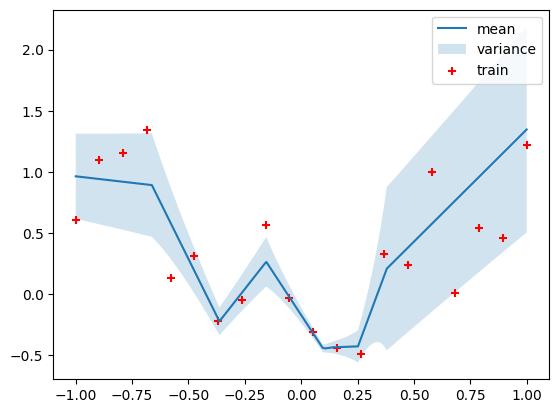

In [11]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=10, activation='relu', name="layer_1"),
    layers.Dense(units=10, activation='relu', name="layer_2"),
    # layers.Dense(units=100, activation='relu', name="layer_2b"),
    layers.Dense(units=2, activation='linear', name="layer_3")#, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)),
])
# last_layer = model.get_layer('layer_3')
# l_w = last_layer.get_weights()


X = np.linspace(-1, 1, 20)
y = X**2 + np.random.normal(0, 0.3, size=X.shape)
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.01, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=1500, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


plot_mean_and_variance(model, X_valid, X_train, y_train)

Epoch:   0 | Loss: 1.21332e+00
Epoch: 100 | Loss: -1.89046e+00
Epoch: 200 | Loss: -2.67460e+00
Epoch: 300 | Loss: -3.04173e+00
Epoch: 400 | Loss: -2.14746e+00
Epoch: 500 | Loss: 5.52968e+00
Epoch: 600 | Loss: -2.52561e+00
Epoch: 700 | Loss: -3.04913e+00
Epoch: 800 | Loss: -3.02308e+00
Epoch: 900 | Loss: -3.32365e+00
Epoch: 1000 | Loss: 2.50216e-01
Epoch: 1100 | Loss: -3.40409e+00
Epoch: 1200 | Loss: -3.44149e+00
Epoch: 1300 | Loss: 4.16882e-01
Epoch: 1400 | Loss: -2.14390e+00
313/313 [==============================] - 1s 3ms/step


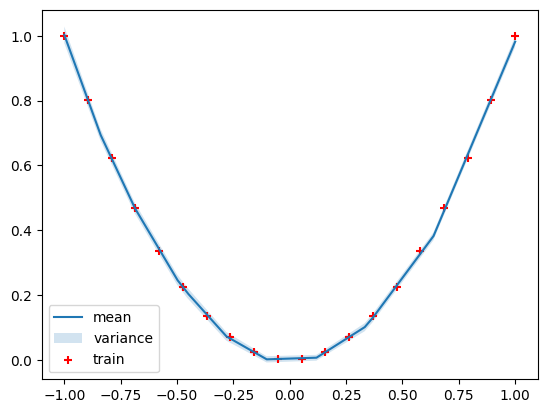

In [12]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=10, activation='relu', name="layer_1"),
    layers.Dense(units=10, activation='relu', name="layer_2"),
    # layers.Dense(units=100, activation='relu', name="layer_2b"),
    layers.Dense(units=2, activation='linear', name="layer_3")#, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)),
])
# last_layer = model.get_layer('layer_3')
# l_w = last_layer.get_weights()


X = np.linspace(-1, 1, 20)
y = X**2 #+ np.random.normal(0, 0., size=X.shape)
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.01, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=1500, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


plot_mean_and_variance(model, X_valid, X_train, y_train)